<a href="https://colab.research.google.com/github/s28629/PAD_final_project/blob/main/Jacek_Piekut_28629_PAD_final_project_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
##Installing external libraries
---

In [2]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 27.6 MB/s eta 0:00:00


In [3]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 3.04s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



---
##Loading external libraries
---

In [4]:
########################################################################################################################
########################################################################################################################

import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import statsmodels.api    as sm
import streamlit          as st

########################################################################################################################
########################################################################################################################

---
##Loading specific functionalities from external libraries
---

In [5]:
########################################################################################################################
########################################################################################################################

from google.colab import drive

from scipy.stats                import zscore

from sklearn.ensemble           import RandomForestRegressor, BaggingRegressor,   AdaBoostRegressor
from sklearn.linear_model       import LinearRegression,      LogisticRegression, Ridge,            Lasso
from sklearn.metrics            import accuracy_score,        mean_squared_error
from sklearn.model_selection    import cross_val_score,       train_test_split
from sklearn.preprocessing      import StandardScaler
from sklearn.utils              import resample

########################################################################################################################
########################################################################################################################

---
##Loading dataset

---

In [6]:
########################################################################################################################

drive.mount('/content/drive')

###########################################

Mounted at /content/drive


In [7]:
########################################################################################################################

location        = '/content/drive/MyDrive/courses/part_2/PAD/final_project_form/'
name_of_dataset = 'real_estate_dataset.csv'
dataset_path    = location + name_of_dataset

########################################################################################################################

In [8]:
########################################################################################################################
# loading the dataset

df = pd.read_csv(filepath_or_buffer=dataset_path)

########################################################################################################################

---
##Exploratory data analysis
---

In [9]:
########################################################################################################################

# displaying the number of records loaded

num_records = len(df)

print("Number of Records Loaded:", num_records)

########################################################################################################################

Number of Records Loaded: 414


---
###Missing values detection
---

In [10]:
########################################################################################################################
# displaying the number of missing entries in each column

missing_values = df.isnull().sum()

print("Missing Values:")
print(missing_values)

########################################################################################################################

Missing Values:
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


---
###Column types analysis
---

In [11]:
########################################################################################################################
# displaying the types of columns

column_types = df.dtypes

print("Column Types:")
print(column_types)

########################################################################################################################

Column Types:
No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object


---
###Displaying sample of records from dataset
---

In [12]:
########################################################################################################################
# displaying the first few rows of the dataset

print("Sample Data:")

print(df.head())

########################################################################################################################

Sample Data:
   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746   

---
###Statistical summary overview
---

In [13]:
########################################################################################################################
# statistical Summary

print("Statistical Summary:")

print(df.describe())

########################################################################################################################

Statistical Summary:
               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience 

---
###Correlation analysis between predictors and response
---

In [14]:
########################################################################################################################
# performing correlation analysis between house price and other variables

price_correlations = df.corr()['Y house price of unit area'].drop(['Y house price of unit area', 'No'])

print("\nCorrelation with House Price:")
print(price_correlations)

########################################################################################################################


Correlation with House Price:
X1 transaction date                       0.087491
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
Name: Y house price of unit area, dtype: float64


---
###Correlation analysis between specific predictors
---

In [15]:
########################################################################################################################
# detailed correlation analysis

print("Correlation Analysis:")

correlation_matrix = df.corr().drop(columns=['No'])

print(correlation_matrix)

########################################################################################################################

Correlation Analysis:
                                        X1 transaction date  X2 house age  \
No                                                -0.048658     -0.032808   
X1 transaction date                                1.000000      0.017549   
X2 house age                                       0.017549      1.000000   
X3 distance to the nearest MRT station             0.060880      0.025622   
X4 number of convenience stores                    0.009635      0.049593   
X5 latitude                                        0.035058      0.054420   
X6 longitude                                      -0.041082     -0.048520   
Y house price of unit area                         0.087491     -0.210567   

                                        X3 distance to the nearest MRT station  \
No                                                                   -0.013573   
X1 transaction date                                                   0.060880   
X2 house age                          

---
###heatmap analysis
---

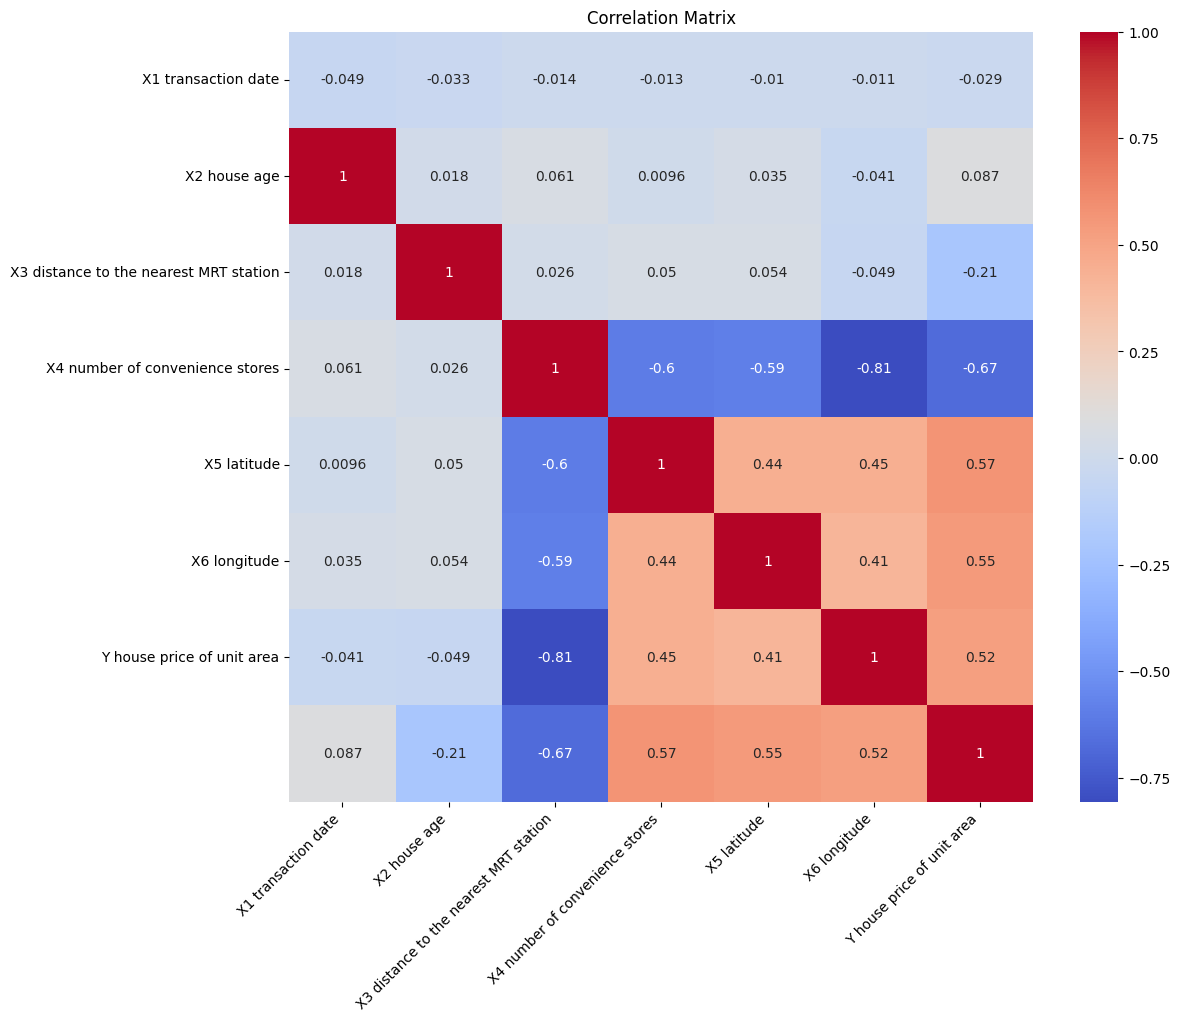

In [16]:
########################################################################################################################
# data visualsation

plt.figure(figsize=(12, 10))

sns.heatmap(
              data=correlation_matrix,
              annot=True,
              cmap="coolwarm",
              xticklabels=correlation_matrix.columns,
              yticklabels=correlation_matrix.columns,
              cbar=True
            )

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix")

plt.savefig("heatmap.png")

plt.show()

########################################################################################################################

---
###Pairplots
---

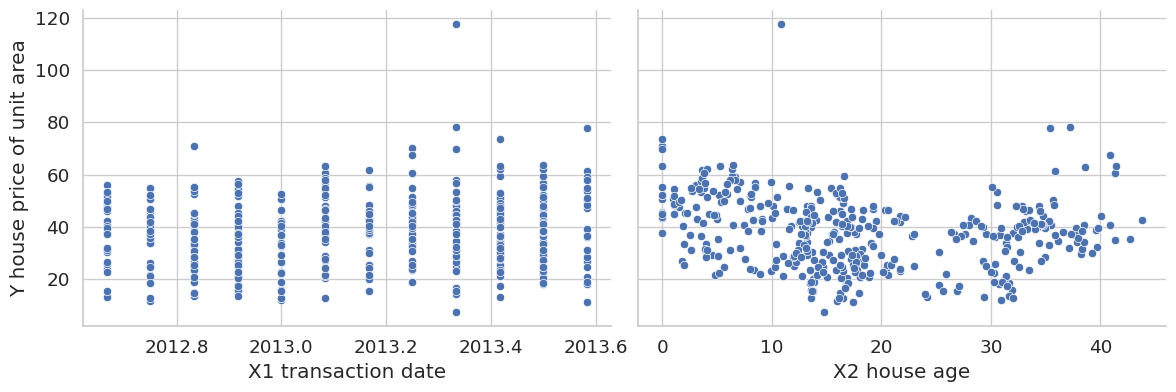

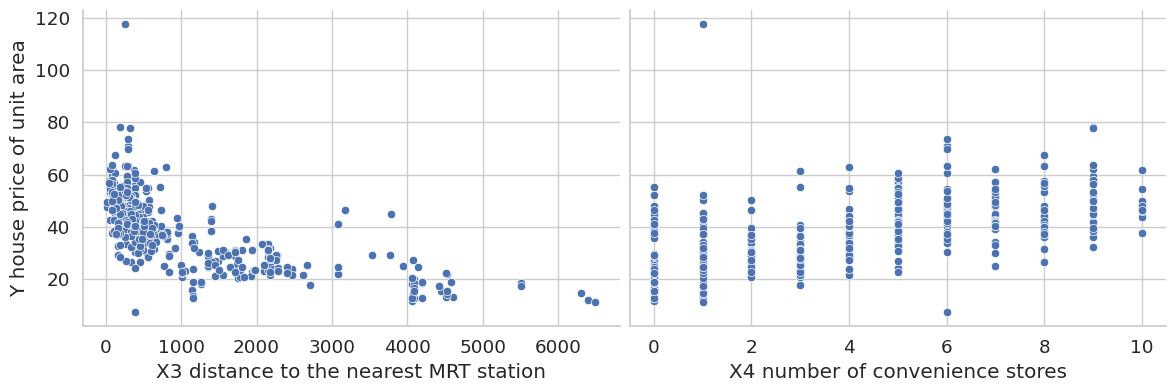

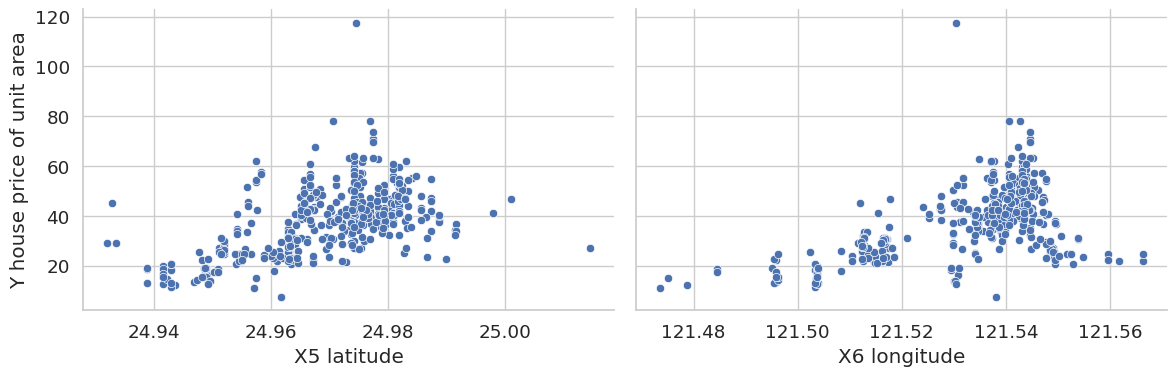

In [17]:
########################################################################################################################
# presenting pairplots

sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# exclusion of 1st entry ("No")
predictor_column_names = df.columns[1:]

# determination of half of dataset's length
# to enable pairwise presentation of plots
half_of_dataset_column_length = (len(df.columns[1:]) - 1)//2

for predictor_column_index in range(0, half_of_dataset_column_length, 1):
  even_index  = 2 * predictor_column_index
  odd_index   = 2 * predictor_column_index + 1

  sns.pairplot(
                data=df,
                x_vars=[predictor_column_names[even_index], predictor_column_names[odd_index]],
                y_vars="Y house price of unit area",
                kind="scatter",
                diag_kind="kde",
                height=4,
                aspect=1.5
               )
  # index fixes
  # to increase readability and consistency
  # with labels in the dataset
  plt.savefig(f"pair_plots_X{even_index + 1}_X{odd_index + 1}.png")

plt.tight_layout()


########################################################################################################################

---
###Feature importance
---

In [18]:
########################################################################################################################
# feature importance

print("Feature Importance:")

X = df.drop(columns=[df.columns[0], df.columns[-1]])
y = df[df.columns[-1]]

model = RandomForestRegressor()
model.fit(X=X, y=y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print(feature_importance)

########################################################################################################################

Feature Importance:
X3 distance to the nearest MRT station    0.582747
X2 house age                              0.179903
X5 latitude                               0.098147
X6 longitude                              0.073773
X1 transaction date                       0.042993
X4 number of convenience stores           0.022438
dtype: float64


---
###Outlier detection
---

In [19]:
########################################################################################################################
# outlier detection

print("Outlier Detection:")

Q1        = df.quantile(q=0.25)
Q3        = df.quantile(q=0.75)
IQR       = Q3 - Q1
outliers  = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

outlier_records = df[outliers]

print(outlier_records)

########################################################################################################################

Outlier Detection:
      No  X1 transaction date  X2 house age  \
8      9             2013.500          31.7   
30    31             2013.500          25.9   
35    36             2013.500          13.9   
40    41             2013.000          13.6   
41    42             2013.500          16.8   
48    49             2013.417          24.2   
49    50             2012.667          29.4   
58    59             2013.500          30.3   
73    74             2013.167          13.8   
87    88             2013.583          16.9   
89    90             2013.500          23.0   
116  117             2013.000          30.9   
117  118             2013.000          13.6   
148  149             2013.500          16.4   
154  155             2013.500          16.9   
155  156             2013.167          13.8   
162  163             2012.750          16.0   
170  171             2013.333          24.0   
176  177             2012.833          13.9   
180  181             2012.667          26

---
###duplicate verification
---

In [20]:
########################################################################################################################
# data quality assessment

print("data Quality Assessment:")

duplicates        = df.duplicated()
duplicate_records = df[duplicates]

print(duplicate_records)

########################################################################################################################

data Quality Assessment:
Empty DataFrame
Columns: [No, X1 transaction date, X2 house age, X3 distance to the nearest MRT station, X4 number of convenience stores, X5 latitude, X6 longitude, Y house price of unit area]
Index: []


---
###Mean values of response within time indicator
---

In [21]:
########################################################################################################################
# calculating the average house price for each transaction date

average_price_by_date = df.groupby('X1 transaction date')['Y house price of unit area'].mean()

print("\nAverage House Price by Transaction Date:")
print(average_price_by_date)

########################################################################################################################


Average House Price by Transaction Date:
X1 transaction date
2012.667    38.543333
2012.750    35.581481
2012.833    35.683871
2012.917    35.557895
2013.000    31.057143
2013.083    40.493478
2013.167    38.304000
2013.250    41.293750
2013.333    41.562069
2013.417    38.453448
2013.500    38.119149
2013.583    39.604348
Name: Y house price of unit area, dtype: float64


---
###Data distribution for response
---

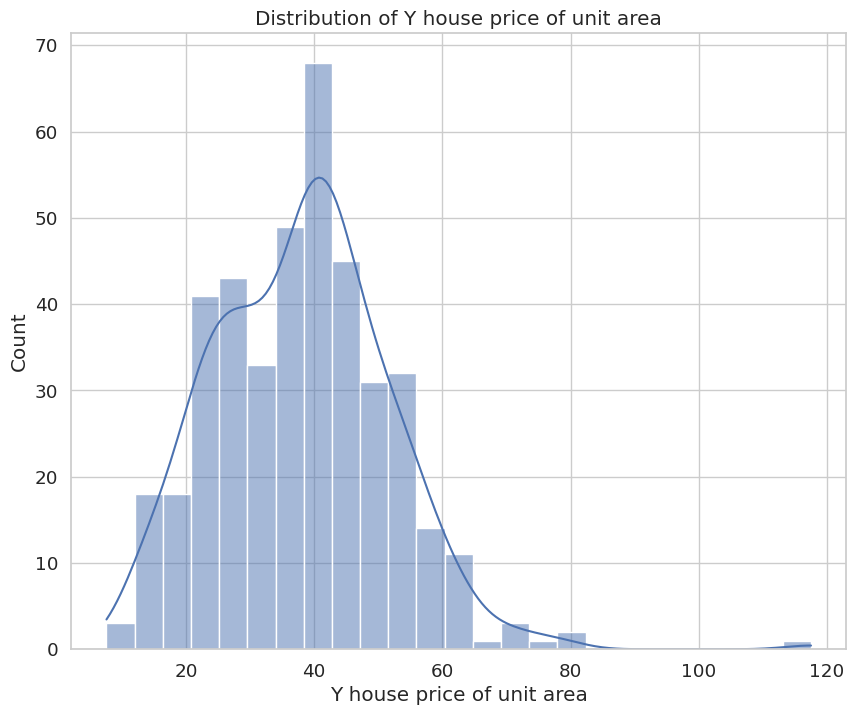

In [22]:
########################################################################################################################
# data distribution for response

plt.figure(figsize=(10, 8))

sns.histplot(df[df.columns[-1]], kde=True, bins=25)

plt.title("Distribution of Y house price of unit area")

plt.savefig("outcome_distribution.png")

plt.show()

########################################################################################################################

---
##Data preprocessing
---


---
##Duplicates removal
---

In [23]:
########################################################################################################################
# dropping duplicates

df.drop_duplicates(inplace=True)

########################################################################################################################

---
##Filling missing values
---

In [24]:
########################################################################################################################
# filling missing values with the mean

df.fillna(df.mean(), inplace=True)

########################################################################################################################

---
##Removal of outliers
---

In [25]:
########################################################################################################################
# removing outliers using z-score

z_scores        = zscore(df)
df_no_outliers  = df[(z_scores < 3).all(axis=1)]

########################################################################################################################

---
##Extraction of training and testing dataset
---

In [26]:
########################################################################################################################

X = df.drop(columns=['Y house price of unit area'])
y = df['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

########################################################################################################################

---
##Modelling
---

In [27]:
########################################################################################################################
# performing statistical significance of parameters

# defining the dependent variable
y_analysed = df['Y house price of unit area']

# defining the independent variables
X_analysed = df.drop(columns=['No', 'Y house price of unit area'])

# adding a constant term to the independent variables
X_analysed = sm.add_constant(X_analysed)

# fitting the model
model = sm.OLS(y_analysed, X_analysed)
results = model.fit()

# printing the summary of the regression results
print(results.summary())

########################################################################################################################

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.582
Model:                                    OLS   Adj. R-squared:                  0.576
Method:                         Least Squares   F-statistic:                     94.59
Date:                        Sun, 25 Jun 2023   Prob (F-statistic):           4.86e-74
Time:                                05:59:20   Log-Likelihood:                -1487.0
No. Observations:                         414   AIC:                             2988.
Df Residuals:                             407   BIC:                             3016.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [28]:
########################################################################################################################
# performing a regression analysis to predict house prices

model = LinearRegression()
model.fit(X_train, y_train)

print("Regression Model Coefficients:")
print(model.coef_)

print("Regression Model Intercept:")
print(model.intercept_)

########################################################################################################################

Regression Model Coefficients:
[-5.61695287e-03  5.40743502e+00 -2.67827999e-01 -4.81543315e-03
  1.08114445e+00  2.26048799e+02 -3.01254914e+01]
Regression Model Intercept:
-12824.256569928497


---
##Linear Regression applied to standardised dataset's entries
---

In [29]:
########################################################################################################################

# Linear Regression without standardisation
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# making predictions without standardisation
y_pred_linear = linear_model.predict(X_test)

# calculating mean squared error without standardisation
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Standardisation
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Linear Regression with standardisation
linear_model_std = LinearRegression()
linear_model_std.fit(X_train_std, y_train)

# making predictions with standardization
y_pred_linear_std = linear_model_std.predict(X_test_std)

# calculating mean squared error with standardization
mse_linear_std = mean_squared_error(y_test, y_pred_linear_std)

print("Linear Regression (Without Standardisation) Mean Squared Error : ", mse_linear)
print("Linear Regression (With Standardisation) Mean Squared Error    : ", mse_linear_std)

########################################################################################################################

Linear Regression (Without Standardisation) Mean Squared Error :  54.60196067337693
Linear Regression (With Standardisation) Mean Squared Error    :  54.60196067337648


---
##Applying Cross-Validation, Bootstrap
---

In [30]:
########################################################################################################################

# Linear Regression without any technique
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# making predictions without any technique
y_pred_linear = linear_model.predict(X_test)

# calculating mean squared error without any technique
mse_linear = mean_squared_error(y_test, y_pred_linear)

# K-fold Cross-Validation
k = 5
linear_model_cv = LinearRegression()
mse_cv          = -cross_val_score(linear_model_cv, X, y, scoring='neg_mean_squared_error', cv=k)
mean_mse_cv     = mse_cv.mean()


# Bootstrap
n_iterations  = 100
mse_bootstrap = []

for _ in range(n_iterations):
    X_resampled, y_resampled = resample(X, y, random_state=42)
    linear_model_bootstrap   = LinearRegression()

    linear_model_bootstrap.fit(X_resampled, y_resampled)

    y_pred_bootstrap = linear_model_bootstrap.predict(X_test)

    mse_bootstrap.append(mean_squared_error(y_test, y_pred_bootstrap))

mean_mse_bootstrap = sum(mse_bootstrap) / n_iterations

print("Linear Regression (Without Any Technique) Mean Squared Error   : ", mse_linear)
print("Linear Regression (K-fold Cross-Validation) Mean Squared Error : ", mean_mse_cv)
print("Linear Regression (Bootstrap) Mean Squared Error               : ", mean_mse_bootstrap)

########################################################################################################################

Linear Regression (Without Any Technique) Mean Squared Error   :  54.60196067337693
Linear Regression (K-fold Cross-Validation) Mean Squared Error :  78.36387313299599
Linear Regression (Bootstrap) Mean Squared Error               :  57.28074423245371


---
##Applying further techniques
---

In [31]:
########################################################################################################################
# Linear Regression (Without Any Technique)

linear_model  = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)
mse_linear    = mean_squared_error(y_test, y_pred_linear)

print("Linear Regression (Without Any Technique) Mean Squared Error:", mse_linear)

########################################################################################################################

Linear Regression (Without Any Technique) Mean Squared Error: 54.60196067337693


---
##Backward selection
---

In [32]:
########################################################################################################################
# Backward Selection with Stepwise Approach

# creating a copy of the feature matrix X
X_backward = X.copy()

# initialsing the list of selected features with all features
selected_features_backward = X_backward.columns.tolist()

while len(selected_features_backward) > 0:
    # fitting the linear regression model with the selected features
    model   = sm.OLS(y, X_backward[selected_features_backward])
    results = model.fit()

    # getting the p-values for all features
    p_values = results.pvalues

    # finding the feature with the highest p-value
    feature_to_remove = p_values.idxmax()

    # removing the feature from the selected features list
    selected_features_backward.remove(feature_to_remove)

# creating the final training and test datasets with the selected features
X_train_backward  = X_train[selected_features_backward]
X_test_backward   = X_test[selected_features_backward]

# fitting the linear regression model on the selected features
if len(selected_features_backward) > 0:
    backward_model = LinearRegression()
    backward_model.fit(X_train_backward.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

    # predicting the target variable on the test set
    y_pred_backward = backward_model.predict(X_test_backward.values.reshape(-1, 1))
    mse_backward    = mean_squared_error(y_test, y_pred_backward)

    print("Linear Regression (Backward Selection) Mean Squared Error:", mse_backward)
else:
    print("No features selected for backward selection")


########################################################################################################################

No features selected for backward selection


---
##Forward selection
---

In [33]:
########################################################################################################################
# Forward Selection with Stepwise Approach

# initialising an empty list to store selected features
selected_features_forward = []

# creat a copy of the feature matrix X
X_forward = X.copy()

# defining the number of features to select
n_features = X_forward.shape[1]

for _ in range(n_features):
    best_mse = float('inf')
    best_feature = None

    # iterating over the remaining features not yet selected
    for feature in X_forward.columns:
        # Add the current feature to the selected features
        selected_features_temp = selected_features_forward + [feature]

        # fitting the linear regression model with the selected features
        model = sm.OLS(y, X[selected_features_temp])
        results = model.fit()

        # calculating the MSE
        y_pred = results.predict(X_test[selected_features_temp])
        mse = mean_squared_error(y_test, y_pred)

        # updating the best feature if the MSE improves
        if mse < best_mse:
            best_mse      = mse
            best_feature  = feature

    # adding the best feature to the selected features list
    selected_features_forward.append(best_feature)

    # removing the best feature from the remaining features
    X_forward.drop(best_feature, axis=1, inplace=True)

# creating the final training and test datasets with the selected features
X_train_forward = X_train[selected_features_forward]
X_test_forward  = X_test[selected_features_forward]

# fitting the linear regression model on the selected features
forward_model = LinearRegression()
forward_model.fit(X_train_forward, y_train)

# Predict the target variable on the test set
y_pred_forward = forward_model.predict(X_test_forward)
mse_forward    = mean_squared_error(y_test, y_pred_forward)

print("Linear Regression (Forward Selection) Mean Squared Error:", mse_forward)


########################################################################################################################

Linear Regression (Forward Selection) Mean Squared Error: 54.60196067337547


---
##Ridge regression
---

In [34]:
########################################################################################################################
# Ridge Regression

ridge_model   = Ridge(alpha=0.5)

ridge_model.fit(X_train, y_train)

y_pred_ridge  = ridge_model.predict(X_test)
mse_ridge     = mean_squared_error(y_test, y_pred_ridge)

print("Ridge Regression Mean Squared Error:", mse_ridge)

########################################################################################################################

Ridge Regression Mean Squared Error: 57.451102093712855


---
##Lasso regression
---

In [35]:
########################################################################################################################
# Lasso Regression

lasso_model   = Lasso(alpha=0.1)

lasso_model.fit(X_train, y_train)

y_pred_lasso  = lasso_model.predict(X_test)
mse_lasso     = mean_squared_error(y_test, y_pred_lasso)

print("Lasso Regression Mean Squared Error:", mse_lasso)

########################################################################################################################

Lasso Regression Mean Squared Error: 58.05675624655532
